In [39]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

In [40]:
data = pd.read_csv('../comp_semana_7/solar_train.csv')

In [41]:
data.head(5)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475175023,9/29/2016 12:00:00 AM,08:50:23,634.99,61,30.46,41,14.96,6.75,06:13:00,18:13:00
1,1481799902,12/15/2016 12:00:00 AM,01:05:02,1.27,37,30.26,70,207.43,5.62,06:50:00,17:46:00
2,1478339417,11/4/2016 12:00:00 AM,23:50:17,1.21,47,30.49,33,168.20,5.62,06:25:00,17:47:00
3,1472887208,9/2/2016 12:00:00 AM,21:20:08,1.67,54,30.46,101,152.60,3.37,06:07:00,18:37:00
4,1478724901,11/9/2016 12:00:00 AM,10:55:01,839.78,62,30.47,36,291.95,7.87,06:28:00,17:45:00


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24514 entries, 0 to 24513
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                24514 non-null  int64  
 1   Data                    24514 non-null  object 
 2   Time                    24514 non-null  object 
 3   Radiation               24514 non-null  float64
 4   Temperature             24514 non-null  int64  
 5   Pressure                24514 non-null  float64
 6   Humidity                24514 non-null  int64  
 7   WindDirection(Degrees)  24514 non-null  float64
 8   Speed                   24514 non-null  float64
 9   TimeSunRise             24514 non-null  object 
 10  TimeSunSet              24514 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.1+ MB


**1a ITERACIÓN**

Sin Data, UNIXTime, horas en segundos desde las 00.00 y datos normalizados

Resultado final RMSE: 81.7883

In [43]:
#Eliminamos columna de Data porque esta ya está reflejada en la columna UNIXTime. Mantenemos la columna de Time por el momento para comprobar si hay correlación con la hora del día.
data_1 = data.drop(columns = 'Data')

In [44]:
#Cambiamos el formato de las horas a segundos desde las 00.00 usando dt.total_seconds()
from datetime import datetime

In [45]:
#Transformar cada una de esas columnas a formato datetime:
def convert_datetime(string):
    return datetime.strptime(string,'%H:%M:%S')

#transformar las columnas a segundos:
def data_to_seconds(value):
    hora_dt = convert_datetime(value)
    return hora_dt.hour * 3600 + hora_dt.minute * 60 + hora_dt.second

In [46]:
data_1['TimeSunRise'] = data_1['TimeSunRise'].apply(data_to_seconds)
data_1['TimeSunSet'] = data_1['TimeSunSet'].apply(data_to_seconds)
data_1['Time'] = data_1['Time'].apply(data_to_seconds)

In [47]:
data_1.head(2)

,UNIXTime,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475175023,31823,634.99,61,30.46,41,14.96,6.75,22380,65580
1,1481799902,3902,1.27,37,30.26,70,207.43,5.62,24600,63960


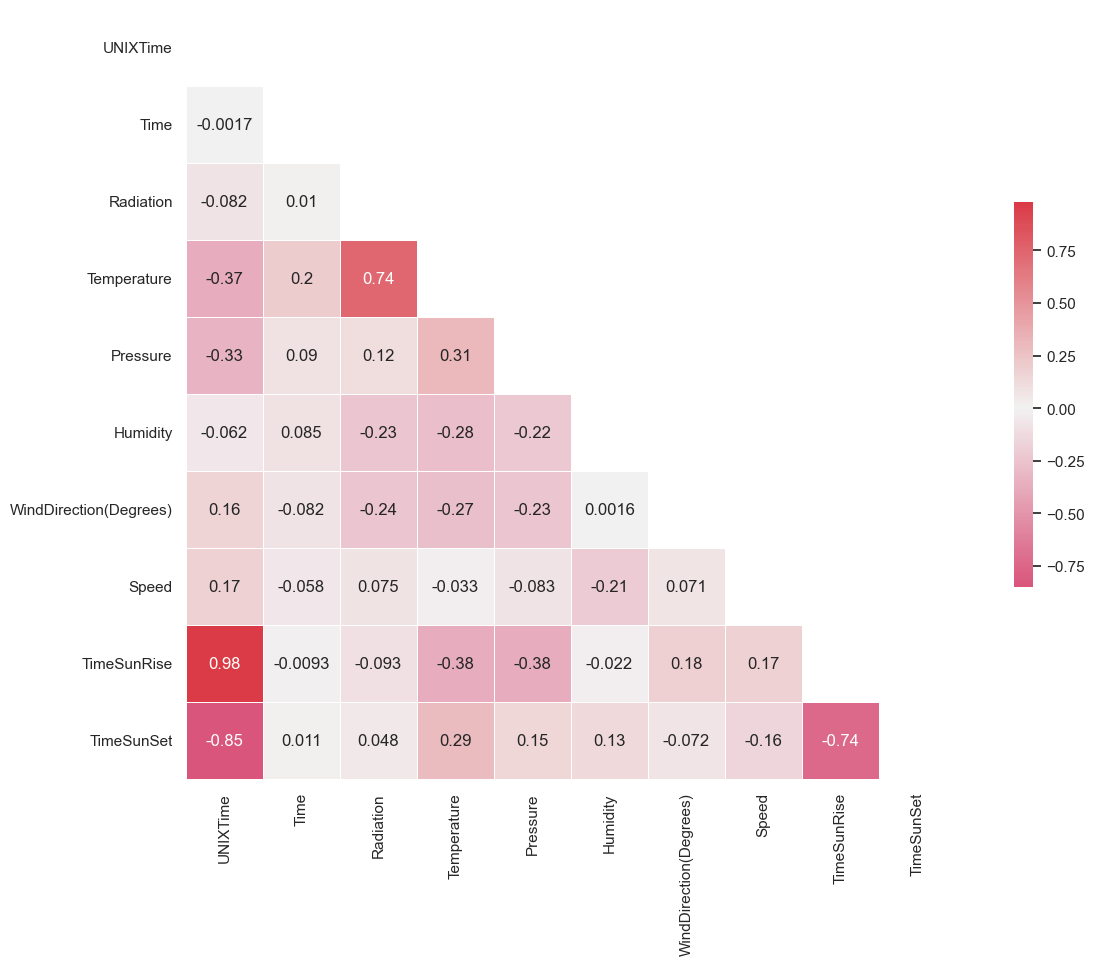

In [48]:
#creamos un heatmap para ver la correlación entre las variables:

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(data_1.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(data_1.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

Hay una fuerte correlación entre UNIXTime y TimeSunRise, y una correlación importante también entre la primera y TimeSunSet, por lo que en esta iteración eliminamos la columna UNIXTime.
La principal correlación con la radiación (nuestro objetivo) entre los datos con los que contamos es la temperatura (0.73) seguido de la dirección del viento y la humedad, estas últimas inversamente proporcionales.

In [49]:
data_1.drop(columns = ['UNIXTime'], inplace = True)

In [50]:
data_1.head(10)

,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,31823,634.99,61,30.46,41,14.96,6.75,22380,65580
1,3902,1.27,37,30.26,70,207.43,5.62,24600,63960
2,85817,1.21,47,30.49,33,168.20,5.62,23100,64020
3,76808,1.67,54,30.46,101,152.60,3.37,22020,67020
4,39301,839.78,62,30.47,36,291.95,7.87,23280,63900
5,82549,1.23,46,30.42,95,105.77,2.25,24780,64140
6,53105,209.25,52,30.44,94,84.43,9.00,23820,63720
7,29118,393.73,56,30.47,25,138.86,4.50,23100,64020
8,69349,1.24,49,30.47,40,180.21,7.87,24840,64200
9,84050,1.18,44,30.45,32,168.91,10.12,24960,64320


In [51]:
#separamos los grupos de testeo y entreno:
X = data_1.drop(columns = ['Radiation'])
y = data_1['Radiation']

In [52]:
from sklearn.model_selection import train_test_split as tts 

In [53]:
X_train, X_test, y_train, y_test = tts(X, y, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18385, 8), (6129, 8), (18385,), (6129,))

In [54]:
#normalizamos los datos de entrenamiento y testeo:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
#importamos varias librerías y modelos de regresión para entrenar, predecir y evaluar:
#regresiones lineales:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge    
from sklearn.linear_model import ElasticNet 
#regresion de soporte vectorial
from sklearn.svm import SVR
#RandomForest:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor

In [57]:
#inicializamos modelos
#regresiones lineales:
linreg = LinearRegression()
lass = Lasso()
rid = Ridge()    
elastic = ElasticNet()
#regresion de soporte vectorial
svr = SVR()
#RandomForest:
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()

In [58]:
#entrenamos modelos:
#regresiones lineales:
linreg.fit(X_train, y_train)
lass.fit(X_train, y_train)
rid.fit(X_train, y_train) 
elastic .fit(X_train, y_train)
#regresion de soporte vectorial
svr.fit(X_train, y_train)
#RandomForest:
rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)


ExtraTreeRegressor()

In [59]:
#calculamos predicciones:
#regresiones lineales:
y_pred_linreg = linreg.predict(X_test)
y_pred_lass = lass.predict(X_test)
y_pred_rid = rid.predict(X_test) 
y_pred_elastic = elastic .predict(X_test)
#regresion de soporte vectorial
y_pred_svr = svr.predict(X_test)
#RandomForest:
y_pred_rfr = rfr.predict(X_test)
y_pred_etr = etr.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error as mse

In [61]:
print('Evaluacion de modelos')
print('Modelos de regresión lineal:')
print('LinearRegression:', mse(y_test, y_pred_linreg, squared=False))
print('Lasso:', mse(y_test, y_pred_lass, squared=False))
print('Ridge:', mse(y_test, y_pred_rid, squared=False))
print('ElasticNet:', mse(y_test, y_pred_elastic, squared=False))
print('Modelos de soporte vectorial:')
print('SVR:', mse(y_test, y_pred_svr, squared=False))
print('Modelos RandomForest:')
print('RandomForestRegressor:', mse(y_test, y_pred_rfr, squared=False))
print('ExtraTreeRegressor:', mse(y_test, y_pred_etr, squared=False))

Evaluacion de modelos
Modelos de regresión lineal:
LinearRegression: 196.18075390869305
Lasso: 196.12478797975652
Ridge: 196.18042038590966
ElasticNet: 218.138382962312
Modelos de soporte vectorial:
SVR: 205.5206509029213
Modelos RandomForest:
RandomForestRegressor: 81.57518114436324
ExtraTreeRegressor: 120.46876667122487


In [65]:
#despues de entrenar y comparar entre modelos, RandomForest es el que nos proporciona un RMSE más bajo, por lo que lo reentrenamos con el dataset completo:
#primero normalizamos el dataset de prueba completo:
X_final = scaler.transform(X)

In [67]:
rfr.fit(X_final,y)
new_pred = rfr.predict(X_final)
mse(y,new_pred, squared=False)

29.518035114601876

In [68]:
#El RSME ha bajado a 29.55

In [72]:
#Aplicamos el modelo al dataset de testeo final, con los datos formateados igual, y guardamos el resultado:
data_test=pd.read_csv('solar_test.csv')
data_test.head(3)

,id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1478720107,11/9/2016 12:00:00 AM,09:35:07,59,30.47,44,312.67,3.37,06:28:00,17:45:00
1,1,1474063503,9/16/2016 12:00:00 AM,12:05:03,59,30.48,83,38.01,6.75,06:10:00,18:25:00
2,2,1476109221,10/10/2016 12:00:00 AM,04:20:21,47,30.39,78,213.62,5.62,06:16:00,18:03:00


In [73]:
data_test = data_test.drop(columns = ['Data','id','UNIXTime'])
data_test['TimeSunRise'] = data_test['TimeSunRise'].apply(data_to_seconds)
data_test['TimeSunSet'] = data_test['TimeSunSet'].apply(data_to_seconds)
data_test['Time'] = data_test['Time'].apply(data_to_seconds)
data_test = scaler.transform(data_test)


In [74]:
#predicción final 1:
final_pred = rfr.predict(data_test)

In [76]:
submission = pd.read_csv('submission.csv')

In [82]:
submission['Radiation'] = final_pred
submission.to_csv('submission_iteration_1.csv', index=False)

2a ITERACIÓN

Repetimos el entrenamiento de los modelos con los mismos datos que en la primera iteriación, esta vez con los datos sin normalizar

Resultado final RMSE: 81.852

In [90]:

#dividimos el dataset de nuevo para utilizar los datos no normalizados:
X_train, X_test, y_train, y_test = tts(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18385, 8), (6129, 8), (18385,), (6129,))

In [91]:
#reinicializamos modelos
#regresiones lineales:
linreg = LinearRegression()
lass = Lasso()
rid = Ridge()    
elastic = ElasticNet()
#regresion de soporte vectorial
svr = SVR()
#RandomForest:
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()

In [92]:
#los entrenamos de nuevo:
#regresiones lineales:
linreg.fit(X_train, y_train)
lass.fit(X_train, y_train)
rid.fit(X_train, y_train) 
elastic .fit(X_train, y_train)
#regresion de soporte vectorial
svr.fit(X_train, y_train)
#RandomForest:
rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)

ExtraTreeRegressor()

In [93]:
#calculamos predicciones:
#regresiones lineales:
y_pred_linreg = linreg.predict(X_test)
y_pred_lass = lass.predict(X_test)
y_pred_rid = rid.predict(X_test) 
y_pred_elastic = elastic .predict(X_test)
#regresion de soporte vectorial
y_pred_svr = svr.predict(X_test)
#RandomForest:
y_pred_rfr = rfr.predict(X_test)
y_pred_etr = etr.predict(X_test)

In [94]:
print('Evaluacion de modelos 2:')
print('Modelos de regresión lineal:')
print('LinearRegression:', mse(y_test, y_pred_linreg, squared=False))
print('Lasso:', mse(y_test, y_pred_lass, squared=False))
print('Ridge:', mse(y_test, y_pred_rid, squared=False))
print('ElasticNet:', mse(y_test, y_pred_elastic, squared=False))
print('Modelos de soporte vectorial:')
print('SVR:', mse(y_test, y_pred_svr, squared=False))
print('Modelos RandomForest:')
print('RandomForestRegressor:', mse(y_test, y_pred_rfr, squared=False))
print('ExtraTreeRegressor:', mse(y_test, y_pred_etr, squared=False))

Evaluacion de modelos 2:
Modelos de regresión lineal:
LinearRegression: 192.8150540951704
Lasso: 193.64768025748992
Ridge: 192.8129036336677
ElasticNet: 193.74079422216582
Modelos de soporte vectorial:
SVR: 299.31051359908196
Modelos RandomForest:
RandomForestRegressor: 78.58252940554038
ExtraTreeRegressor: 122.37496153077637


In [95]:
#RandomForest vuelve a ser el modelo con el valor más bajo, por debajo de la anterior iteración.
#Repetimos el entrenamiento con todo el dataset y recalculamos RMSE:
rfr.fit(X,y)
new_pred = rfr.predict(X)
mse(y,new_pred, squared=False)

29.230586787813312

In [97]:
#Es ligeramente inferior al de la primera iteración, así que volvemos a aplicar el modelo al dataset final:
data_test=pd.read_csv('solar_test.csv')
data_test = data_test.drop(columns = ['Data','id','UNIXTime'])
data_test['TimeSunRise'] = data_test['TimeSunRise'].apply(data_to_seconds)
data_test['TimeSunSet'] = data_test['TimeSunSet'].apply(data_to_seconds)
data_test['Time'] = data_test['Time'].apply(data_to_seconds)
final_pred = rfr.predict(data_test)
submission['Radiation'] = final_pred
submission.to_csv('submission_iteration_2.csv', index=False)


**3a ITERACIÓN:**

Sin Data, TimeSunrise, TimeSunset, horas en segundos desde las 00.00 y datos normalizados


Resultado final RMSE: 80.58555

In [102]:
data_2 = data.drop(columns=['Data', 'TimeSunRise', 'TimeSunSet'])
data_2['Time'] = data_2['Time'].apply(data_to_seconds)

In [103]:
data_2.head(2)

,UNIXTime,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1475175023,31823,634.99,61,30.46,41,14.96,6.75
1,1481799902,3902,1.27,37,30.26,70,207.43,5.62


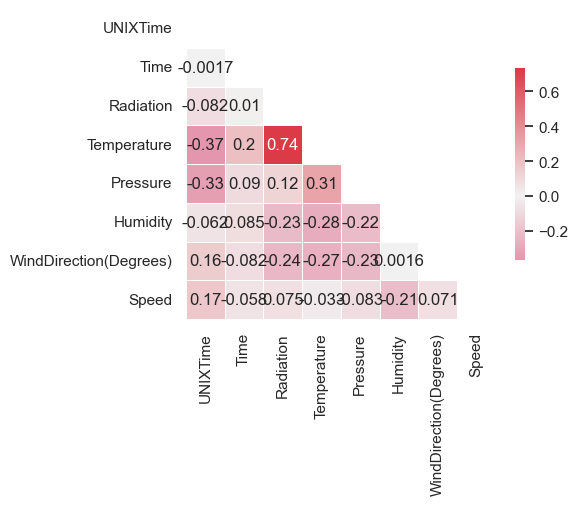

In [113]:
#creamos de nuevo el heatmap, y parece que no tenemos colinealidad:

plt.figure(figsize=(5, 5))

sns.set(style='white')

mask=np.triu(np.ones_like(data_2.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(data_2.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [106]:
X = data_2.drop(columns='Radiation')
y = data_2['Radiation']

X_train, X_test, y_train, y_test = tts(X, y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18385, 7), (18385,), (6129, 7), (6129,))

In [117]:
#normalizamos datos de training y testeo:
scaler = StandardScaler()  #inicializamos modelo
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [109]:
#reinicializamos modelos
#regresiones lineales:
linreg = LinearRegression()
lass = Lasso()
rid = Ridge()    
elastic = ElasticNet()
#regresion de soporte vectorial
svr = SVR()
#RandomForest:
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()

In [110]:
#los entrenamos de nuevo:
#regresiones lineales:
linreg.fit(X_train, y_train)
lass.fit(X_train, y_train)
rid.fit(X_train, y_train) 
elastic .fit(X_train, y_train)
#regresion de soporte vectorial
svr.fit(X_train, y_train)
#RandomForest:
rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)

ExtraTreeRegressor()

In [111]:
#calculamos predicciones:
#regresiones lineales:
y_pred_linreg = linreg.predict(X_test)
y_pred_lass = lass.predict(X_test)
y_pred_rid = rid.predict(X_test) 
y_pred_elastic = elastic .predict(X_test)
#regresion de soporte vectorial
y_pred_svr = svr.predict(X_test)
#RandomForest:
y_pred_rfr = rfr.predict(X_test)
y_pred_etr = etr.predict(X_test)

In [112]:
print('Evaluacion de modelos 3:')
print('Modelos de regresión lineal:')
print('LinearRegression:', mse(y_test, y_pred_linreg, squared=False))
print('Lasso:', mse(y_test, y_pred_lass, squared=False))
print('Ridge:', mse(y_test, y_pred_rid, squared=False))
print('ElasticNet:', mse(y_test, y_pred_elastic, squared=False))
print('Modelos de soporte vectorial:')
print('SVR:', mse(y_test, y_pred_svr, squared=False))
print('Modelos RandomForest:')
print('RandomForestRegressor:', mse(y_test, y_pred_rfr, squared=False))
print('ExtraTreeRegressor:', mse(y_test, y_pred_etr, squared=False))

Evaluacion de modelos 3:
Modelos de regresión lineal:
LinearRegression: 195.33367719396435
Lasso: 195.39016412954092
Ridge: 195.33364873510124
ElasticNet: 218.88051874630793
Modelos de soporte vectorial:
SVR: 197.25388139665017
Modelos RandomForest:
RandomForestRegressor: 80.96995784808419
ExtraTreeRegressor: 121.85469387030125


In [114]:
#Repetimos el entrenamiento con todo el dataset y recalculamos RMSE:
rfr.fit(X,y)
new_pred = rfr.predict(X)
mse(y,new_pred, squared=False)

29.09822400343251

In [121]:
#Aplicamos el modelo al dataset de testeo final, con los datos formateados igual, y guardamos el resultado:
data_test=pd.read_csv('solar_test.csv')
data_test.head(3)

,id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1478720107,11/9/2016 12:00:00 AM,09:35:07,59,30.47,44,312.67,3.37,06:28:00,17:45:00
1,1,1474063503,9/16/2016 12:00:00 AM,12:05:03,59,30.48,83,38.01,6.75,06:10:00,18:25:00
2,2,1476109221,10/10/2016 12:00:00 AM,04:20:21,47,30.39,78,213.62,5.62,06:16:00,18:03:00


In [122]:
data_test = data_test.drop(columns=['Data', 'TimeSunRise', 'TimeSunSet', 'id'])
data_test['Time'] = data_test['Time'].apply(data_to_seconds)
data_test = scaler.transform(data_test)

In [123]:
final_pred = rfr.predict(data_test)
submission['Radiation'] = final_pred
submission.to_csv('submission_iteration_3.csv', index=False)

**4a ITERACIÓN**

Lo mismo, sin normalizar el dataset

In [124]:
#Volvemos a dividir sin normalizar
X = data_2.drop(columns='Radiation')
y = data_2['Radiation']

X_train, X_test, y_train, y_test = tts(X, y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18385, 7), (18385,), (6129, 7), (6129,))

In [125]:
#reinicializamos modelos
#regresiones lineales:
linreg = LinearRegression()
lass = Lasso()
rid = Ridge()    
elastic = ElasticNet()
#regresion de soporte vectorial
svr = SVR()
#RandomForest:
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()

In [126]:
#los entrenamos de nuevo:
#regresiones lineales:
linreg.fit(X_train, y_train)
lass.fit(X_train, y_train)
rid.fit(X_train, y_train) 
elastic .fit(X_train, y_train)
#regresion de soporte vectorial
svr.fit(X_train, y_train)
#RandomForest:
rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)

ExtraTreeRegressor()

In [127]:
#calculamos predicciones:
#regresiones lineales:
y_pred_linreg = linreg.predict(X_test)
y_pred_lass = lass.predict(X_test)
y_pred_rid = rid.predict(X_test) 
y_pred_elastic = elastic .predict(X_test)
#regresion de soporte vectorial
y_pred_svr = svr.predict(X_test)
#RandomForest:
y_pred_rfr = rfr.predict(X_test)
y_pred_etr = etr.predict(X_test)

In [128]:
print('Evaluacion de modelos 4:')
print('Modelos de regresión lineal:')
print('LinearRegression:', mse(y_test, y_pred_linreg, squared=False))
print('Lasso:', mse(y_test, y_pred_lass, squared=False))
print('Ridge:', mse(y_test, y_pred_rid, squared=False))
print('ElasticNet:', mse(y_test, y_pred_elastic, squared=False))
print('Modelos de soporte vectorial:')
print('SVR:', mse(y_test, y_pred_svr, squared=False))
print('Modelos RandomForest:')
print('RandomForestRegressor:', mse(y_test, y_pred_rfr, squared=False))
print('ExtraTreeRegressor:', mse(y_test, y_pred_etr, squared=False))

Evaluacion de modelos 3:
Modelos de regresión lineal:
LinearRegression: 192.48041588158344
Lasso: 192.79375677935636
Ridge: 192.46310532352086
ElasticNet: 192.9605680467234
Modelos de soporte vectorial:
SVR: 376.4988869828265
Modelos RandomForest:
RandomForestRegressor: 77.80030034743133
ExtraTreeRegressor: 127.63049698004576


In [129]:
#reentrenamos con todo el dataset:
rfr.fit(X,y)
new_pred = rfr.predict(X)
mse(y,new_pred, squared=False)

28.779031356831798

In [130]:
#Aplicamos el modelo al dataset de testeo final, con los datos formateados igual, y guardamos el resultado:
data_test=pd.read_csv('solar_test.csv')
data_test = data_test.drop(columns=['Data', 'TimeSunRise', 'TimeSunSet', 'id'])
data_test['Time'] = data_test['Time'].apply(data_to_seconds)
final_pred = rfr.predict(data_test)
submission['Radiation'] = final_pred
submission.to_csv('submission_iteration_4.csv', index=False)

**5a ITERACIÓN**

Aplicamos modelo OLS para determinar las variables relevantes. Lo aplicamos al dataframe sin colinealidad (data_2) con time en formato segundos

Resultados: RandomForest se sube a 200, así que no he subido resultado

In [131]:
data_2.head(3)

,UNIXTime,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1475175023,31823,634.99,61,30.46,41,14.96,6.75
1,1481799902,3902,1.27,37,30.26,70,207.43,5.62
2,1478339417,85817,1.21,47,30.49,33,168.20,5.62


In [132]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [133]:
x = sm.add_constant(data_2[['UNIXTime',
                            'Time',
                            'Temperature',
                            'Pressure',
                            'Humidity',
                            'WindDirection(Degrees)',
                            'Speed']])

y = data_2['Radiation']

modelo = sm.OLS(y, x).fit()

y_pred = modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Radiation   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     5750.
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:45:05   Log-Likelihood:            -1.6398e+05
No. Observations:               24514   AIC:                         3.280e+05
Df Residuals:                   24506   BIC:                         3.280e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.431e+04   1192.036    -20.395      0.000   -2.66e+04    -2.2e+04
UNIXTime                2.298e-05   4.79e-07     47.992      0.000     2.2e-05    2.39e-05
Time                      -0.0021    5.2e-05    -39.790      0.000      -0.002      -0.002
Temperature               43.9957      0.243    181.176      0.000      43.520      44.472
Pressure                -382.5391     25.664    -14.906      0.000    -432.842    -332.237
Humidity                   0.5220      0.054      9.660      0.000       0.416       0.628
WindDirection(Degrees)    -0.2754      0.016    -17.372      0.000      -0.306      -0.244
Speed                      5.8160      0.372     15.646      0.000       5.087       6.545
==============================================================================
Omnibus:                     2291.834   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3619.309
Skew:                           0.700   Prob(JB):                         0.00
Kurtosis:                       4.259   Cond. No.                     1.42e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Parece que los mayores coeficientes de relación son entre presión, temperatura y velocidad, siendo los demás casi 0. Probamos a entrenar los modelos solo con esas variables y calcular el RMSE

In [135]:
X = data_2.loc[:,['Temperature','Pressure','Speed']]
y = data_2['Radiation']

X_train, X_test, y_train, y_test = tts(X, y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

#normalizamos datos de training y testeo:
scaler = StandardScaler()  #inicializamos modelo
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_norm = scaler.transform(X)

In [136]:
#reinicializamos modelos
#regresiones lineales:
linreg = LinearRegression()
lass = Lasso()
rid = Ridge()    
elastic = ElasticNet()
#regresion de soporte vectorial
svr = SVR()
#RandomForest:
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()

In [137]:
#los entrenamos de nuevo:
#regresiones lineales:
linreg.fit(X_train, y_train)
lass.fit(X_train, y_train)
rid.fit(X_train, y_train) 
elastic .fit(X_train, y_train)
#regresion de soporte vectorial
svr.fit(X_train, y_train)
#RandomForest:
rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)

ExtraTreeRegressor()

In [138]:
#calculamos predicciones:
#regresiones lineales:
y_pred_linreg = linreg.predict(X_test)
y_pred_lass = lass.predict(X_test)
y_pred_rid = rid.predict(X_test) 
y_pred_elastic = elastic .predict(X_test)
#regresion de soporte vectorial
y_pred_svr = svr.predict(X_test)
#RandomForest:
y_pred_rfr = rfr.predict(X_test)
y_pred_etr = etr.predict(X_test)

In [139]:
print('Evaluacion de modelos 5:')
print('Modelos de regresión lineal:')
print('LinearRegression:', mse(y_test, y_pred_linreg, squared=False))
print('Lasso:', mse(y_test, y_pred_lass, squared=False))
print('Ridge:', mse(y_test, y_pred_rid, squared=False))
print('ElasticNet:', mse(y_test, y_pred_elastic, squared=False))
print('Modelos de soporte vectorial:')
print('SVR:', mse(y_test, y_pred_svr, squared=False))
print('Modelos RandomForest:')
print('RandomForestRegressor:', mse(y_test, y_pred_rfr, squared=False))
print('ExtraTreeRegressor:', mse(y_test, y_pred_etr, squared=False))

Evaluacion de modelos 3:
Modelos de regresión lineal:
LinearRegression: 207.1769005437942
Lasso: 207.12471857570938
Ridge: 207.17653666166606
ElasticNet: 222.20232581214938
Modelos de soporte vectorial:
SVR: 205.79779048285812
Modelos RandomForest:
RandomForestRegressor: 200.22699953337005
ExtraTreeRegressor: 210.0776199381588


In [140]:
#RMSE sale mucho peor que en los modelos anteriores, así que no lo continuamos

**6a ITERACIÓN**

Vamos a ver si el campo de Data es relevante para la radiación. Vamos a formatearlo y limpiarlo para quedarnos únicamente con el mes.

Resutlados: No llega a ser mejor que los originales, así que no vamos a subir resultados

In [164]:
#convertimos la columna del dataframe original a formato datetime y nos quedamos con el mes:
data_4 = data.copy()
data_4['Data'] = pd.to_datetime(data_4['Data'])
data_4['Data'] = data_4['Data'].apply([lambda x: x.month])

In [168]:
#formateamos las columnas con horas para pasarlas a segundos:
data_4['TimeSunRise'] = data_4['TimeSunRise'].apply(data_to_seconds)
data_4['TimeSunSet'] = data_4['TimeSunSet'].apply(data_to_seconds)
data_4['Time'] = data_4['Time'].apply(data_to_seconds)

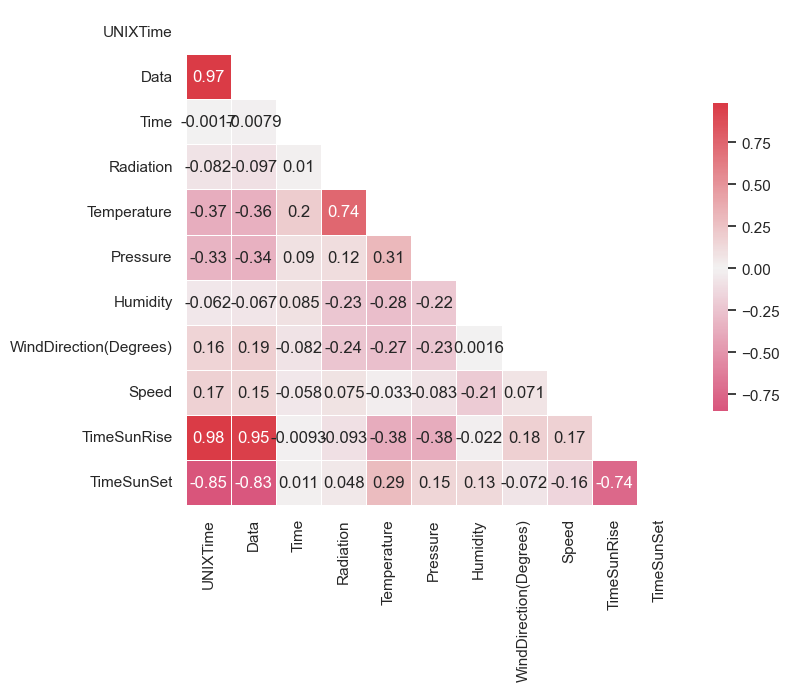

In [191]:
#Creamos el heatmap para ver colinealidad (quitaremos UNIXTime y TimeSunrise):
plt.figure(figsize=(8, 8))

sns.set(style='white')

mask=np.triu(np.ones_like(data_4.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(data_4.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [170]:
X = data_4.drop(columns = ['Radiation', 'UNIXTime', 'TimeSunRise'])
y = data_4['Radiation']

In [184]:
X_train, X_test, y_train, y_test = tts(X,y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18385, 8), (18385,), (6129, 8), (6129,))

In [185]:
#normalizamos datos de training y testeo:
scaler = StandardScaler()  #inicializamos modelo
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_norm = scaler.transform(X)

In [186]:
#reinicializamos modelos
#regresiones lineales:
linreg = LinearRegression()
lass = Lasso()
rid = Ridge()    
elastic = ElasticNet()
#regresion de soporte vectorial
svr = SVR()
#RandomForest:
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()

In [187]:
#los entrenamos de nuevo:
#regresiones lineales:
linreg.fit(X_train, y_train)
lass.fit(X_train, y_train)
rid.fit(X_train, y_train) 
elastic .fit(X_train, y_train)
#regresion de soporte vectorial
svr.fit(X_train, y_train)
#RandomForest:
rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)

ExtraTreeRegressor()

In [188]:
#calculamos predicciones:
#regresiones lineales:
y_pred_linreg = linreg.predict(X_test)
y_pred_lass = lass.predict(X_test)
y_pred_rid = rid.predict(X_test) 
y_pred_elastic = elastic .predict(X_test)
#regresion de soporte vectorial
y_pred_svr = svr.predict(X_test)
#RandomForest:
y_pred_rfr = rfr.predict(X_test)
y_pred_etr = etr.predict(X_test)

In [189]:
print('Evaluacion de modelos 6:')
print('Modelos de regresión lineal:')
print('LinearRegression:', mse(y_test, y_pred_linreg, squared=False))
print('Lasso:', mse(y_test, y_pred_lass, squared=False))
print('Ridge:', mse(y_test, y_pred_rid, squared=False))
print('ElasticNet:', mse(y_test, y_pred_elastic, squared=False))
print('Modelos de soporte vectorial:')
print('SVR:', mse(y_test, y_pred_svr, squared=False))
print('Modelos RandomForest:')
print('RandomForestRegressor:', mse(y_test, y_pred_rfr, squared=False))
print('ExtraTreeRegressor:', mse(y_test, y_pred_etr, squared=False))

Evaluacion de modelos 6:
Modelos de regresión lineal:
LinearRegression: 198.7085742437856
Lasso: 198.70939151971217
Ridge: 198.7085860310125
ElasticNet: 221.56628961962744
Modelos de soporte vectorial:
SVR: 209.45715970495604
Modelos RandomForest:
RandomForestRegressor: 83.26298444207191
ExtraTreeRegressor: 123.13499654606886


In [ ]:
#RMSE en este caso es similar al de los primeros modelos o peor, así que no lo continuamos

**7a ITERACIÓN**

Vamos a combinar las columnas de Time, TimeSunrise y TimeSunset para convertirlas en una sola variable categórica siguiendo esta lógica:


Limpiamos la columna Data y nos quedamos solo con el mes de la fecha

Vamos a crear una nueva variable, con categorías 0 a 5 en las que:
- Categoría 0 serán las horas sin luz
- Categorías 1 a 5 serán 5 franjas en las horas de luz, que sacaremos a partir de los de datos de sunrise y sunset

In [205]:
#Vamos a mantener la fecha con solo el mes y el resto de campos con hora en formato horas
data_5 = data.copy()
data_5.head(2)


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475175023,9/29/2016 12:00:00 AM,08:50:23,634.99,61,30.46,41,14.96,6.75,06:13:00,18:13:00
1,1481799902,12/15/2016 12:00:00 AM,01:05:02,1.27,37,30.26,70,207.43,5.62,06:50:00,17:46:00


In [206]:
data_5['Time'] = data_5['Time'].apply(data_to_seconds)
data_5['TimeSunRise'] = data_5['TimeSunRise'].apply(data_to_seconds)
data_5['TimeSunSet'] = data_5['TimeSunSet'].apply(data_to_seconds)
data_5['Data'] = pd.to_datetime(data_5['Data'])
data_5['Data'] = data_5['Data'].apply([lambda x: x.month])

In [258]:
#Creamos una columna con un clasificador en función del momento del día:
data_5['Class_num'] = (data_5['TimeSunSet'] - data_5['TimeSunRise'])/5
data_5['DayTime'] = range(7, len(data_5)+7)
data_5.loc[data_5['Time'] < data_5['TimeSunRise'], 'DayTime'] = 0
data_5.loc[data_5['Time'] > data_5['TimeSunRise'], 'DayTime'] = 1
data_5.loc[data_5['Time'] > (data_5['TimeSunRise'] + data_5['Class_num']), 'DayTime'] = 2
data_5.loc[data_5['Time'] > (data_5['TimeSunRise'] + (2 * data_5['Class_num'])), 'DayTime'] = 3
data_5.loc[data_5['Time'] > (data_5['TimeSunRise'] + (3 * data_5['Class_num'])), 'DayTime'] = 4
data_5.loc[data_5['Time'] > (data_5['TimeSunRise'] + (4 * data_5['Class_num'])), 'DayTime'] = 5
data_5.loc[data_5['Time'] > data_5['TimeSunSet'], 'DayTime'] = 0
data_5.drop(columns = 'Class_num', inplace = True)

In [259]:
data_5.DayTime.unique()

array([2, 0, 4, 1, 5, 3])

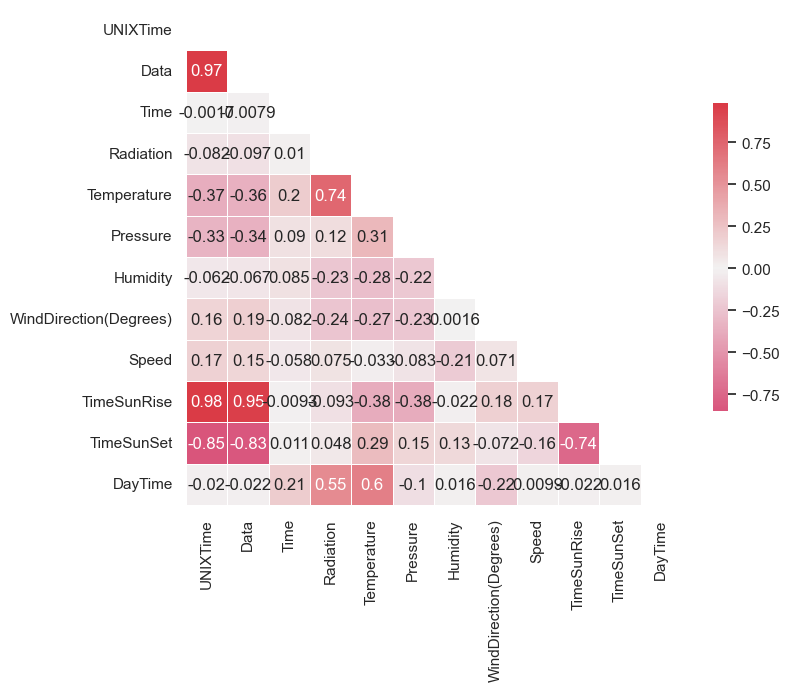

In [260]:
#Creamos otro heatmap (quitaremos TimeSunRise, UNIXTime y TimeSunSet)
plt.figure(figsize=(8, 8))

sns.set_theme(style='white')

mask=np.triu(np.ones_like(data_5.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(data_5.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [261]:
X = data_5.drop(columns = ['TimeSunRise', 'UNIXTime', 'TimeSunSet', 'Radiation'])
y = data_5['Radiation']

X_train, X_test, y_train, y_test = tts(X,y)

#normalización:
scaler = StandardScaler()  #inicializamos modelo
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_norm = scaler.transform(X)

In [262]:
#reinicializamos modelos
#regresiones lineales:
linreg = LinearRegression()
lass = Lasso()
rid = Ridge()    
elastic = ElasticNet()
#regresion de soporte vectorial
svr = SVR()
#RandomForest:
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()

In [263]:
#los entrenamos de nuevo:
#regresiones lineales:
linreg.fit(X_train, y_train)
lass.fit(X_train, y_train)
rid.fit(X_train, y_train) 
elastic .fit(X_train, y_train)
#regresion de soporte vectorial
svr.fit(X_train, y_train)
#RandomForest:
rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)

ExtraTreeRegressor()

In [264]:
#calculamos predicciones:
#regresiones lineales:
y_pred_linreg = linreg.predict(X_test)
y_pred_lass = lass.predict(X_test)
y_pred_rid = rid.predict(X_test) 
y_pred_elastic = elastic .predict(X_test)
#regresion de soporte vectorial
y_pred_svr = svr.predict(X_test)
#RandomForest:
y_pred_rfr = rfr.predict(X_test)
y_pred_etr = etr.predict(X_test)

In [265]:
print('Evaluacion de modelos 7:')
print('Modelos de regresión lineal:')
print('LinearRegression:', mse(y_test, y_pred_linreg, squared=False))
print('Lasso:', mse(y_test, y_pred_lass, squared=False))
print('Ridge:', mse(y_test, y_pred_rid, squared=False))
print('ElasticNet:', mse(y_test, y_pred_elastic, squared=False))
print('Modelos de soporte vectorial:')
print('SVR:', mse(y_test, y_pred_svr, squared=False))
print('Modelos RandomForest:')
print('RandomForestRegressor:', mse(y_test, y_pred_rfr, squared=False))
print('ExtraTreeRegressor:', mse(y_test, y_pred_etr, squared=False))

Evaluacion de modelos 7:
Modelos de regresión lineal:
LinearRegression: 197.13934421965084
Lasso: 197.18503006128
Ridge: 197.1391861146919
ElasticNet: 213.32931133951703
Modelos de soporte vectorial:
SVR: 182.69457064456728
Modelos RandomForest:
RandomForestRegressor: 88.00877293656373
ExtraTreeRegressor: 123.33089145450793


**8a ITERACIÓN**

Lo mismo que la 7, pero esta vez cambiamos las categorías del día con get_dummies y nos quedamos con UNIXTime (con Data sigue saliendo peor)

RSME: 81.90474

In [266]:
data_5.head(2)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,DayTime
0,1475175023,9,31823,634.99,61,30.46,41,14.96,6.75,22380,65580,2
1,1481799902,12,3902,1.27,37,30.26,70,207.43,5.62,24600,63960,0


In [267]:
replacements = {0:'Noche', 1:'Mañana', 2:'Media-mañana', 3:'Mediodía', 4:'Media-tarde', 5:'Tarde'}
data_5['DayTime'].replace(replacements, inplace=True)

In [279]:
X = data_5.drop(columns = ['TimeSunRise', 'Data', 'TimeSunSet', 'Radiation'])
X = pd.get_dummies(X, drop_first = True, dtype = int)
y = data_5['Radiation']

In [280]:
X_train, X_test, y_train, y_test = tts(X,y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18385, 12), (6129, 12), (18385,), (6129,))

In [281]:
scaler = StandardScaler()  #inicializamos modelo
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_norm = scaler.transform(X)

In [282]:
#reinicializamos modelos
#regresiones lineales:
linreg = LinearRegression()
lass = Lasso()
rid = Ridge()    
elastic = ElasticNet()
#regresion de soporte vectorial
svr = SVR()
#RandomForest:
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()

#los entrenamos de nuevo:
#regresiones lineales:
linreg.fit(X_train, y_train)
lass.fit(X_train, y_train)
rid.fit(X_train, y_train) 
elastic .fit(X_train, y_train)
#regresion de soporte vectorial
svr.fit(X_train, y_train)
#RandomForest:
rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)

#calculamos predicciones:
#regresiones lineales:
y_pred_linreg = linreg.predict(X_test)
y_pred_lass = lass.predict(X_test)
y_pred_rid = rid.predict(X_test) 
y_pred_elastic = elastic .predict(X_test)
#regresion de soporte vectorial
y_pred_svr = svr.predict(X_test)
#RandomForest:
y_pred_rfr = rfr.predict(X_test)
y_pred_etr = etr.predict(X_test)

print('Evaluacion de modelos 8:')
print('Modelos de regresión lineal:')
print('LinearRegression:', mse(y_test, y_pred_linreg, squared=False))
print('Lasso:', mse(y_test, y_pred_lass, squared=False))
print('Ridge:', mse(y_test, y_pred_rid, squared=False))
print('ElasticNet:', mse(y_test, y_pred_elastic, squared=False))
print('Modelos de soporte vectorial:')
print('SVR:', mse(y_test, y_pred_svr, squared=False))
print('Modelos RandomForest:')
print('RandomForestRegressor:', mse(y_test, y_pred_rfr, squared=False))
print('ExtraTreeRegressor:', mse(y_test, y_pred_etr, squared=False))

Evaluacion de modelos 8:
Modelos de regresión lineal:
LinearRegression: 143.73612297793147
Lasso: 143.7185482493824
Ridge: 143.73602262059504
ElasticNet: 156.21036313290875
Modelos de soporte vectorial:
SVR: 155.53363189040448
Modelos RandomForest:
RandomForestRegressor: 77.20770063756244
ExtraTreeRegressor: 116.64720379352057


In [283]:
#ha salido mejor, así que reentrenamos con todo el dataset:
rfr.fit(X_norm,y)
new_pred = rfr.predict(X_norm)
mse(y,new_pred, squared=False)

28.856879523931887

In [313]:
#Lo aplicamos al dataset de prueba:
data_test=pd.read_csv('solar_test.csv')
data_test['Time'] = data_test['Time'].apply(data_to_seconds)
data_test['TimeSunRise'] = data_test['TimeSunRise'].apply(data_to_seconds)
data_test['TimeSunSet'] = data_test['TimeSunSet'].apply(data_to_seconds)

In [314]:
data_test['Class_num'] = (data_test['TimeSunSet'] - data_test['TimeSunRise'])/5
data_test['DayTime'] = range(7, len(data_test)+7)
data_test.loc[data_test['Time'] < data_test['TimeSunRise'], 'DayTime'] = 'Noche'
data_test.loc[data_test['Time'] > data_test['TimeSunRise'], 'DayTime'] = 'Mañana'
data_test.loc[data_test['Time'] > (data_test['TimeSunRise'] + data_test['Class_num']), 'DayTime'] = 'Media-mañana'
data_test.loc[data_test['Time'] > (data_test['TimeSunRise'] + (2 * data_test['Class_num'])), 'DayTime'] = 'Mediodía'
data_test.loc[data_test['Time'] > (data_test['TimeSunRise'] + (3 * data_test['Class_num'])), 'DayTime'] = 'Media-tarde'
data_test.loc[data_test['Time'] > (data_test['TimeSunRise'] + (4 * data_test['Class_num'])), 'DayTime'] = 'Tarde'
data_test.loc[data_test['Time'] > data_test['TimeSunSet'], 'DayTime'] = 'Noche'
data_test.drop(columns = 'Class_num', inplace = True)

In [315]:
data_test = data_test.drop(columns = ['id', 'TimeSunRise', 'Data', 'TimeSunSet'])
data_test = pd.get_dummies(data_test, drop_first = True, dtype = int)

In [318]:
data_test = scaler.transform(data_test)
final_pred = rfr.predict(data_test)
submission['Radiation'] = final_pred
submission.to_csv('submission_iteration_8.csv', index=False)

**9a ITERACIÓN**

Veamos si sigue habiendo outliers desde el dataset original. Si los hay, aplicaremos los modelos y luego las distintas transformaciones que hemos ido haciendo

RMSE: 155.36064

In [335]:
data_8 = data.copy()
data_8.head(4)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475175023,9/29/2016 12:00:00 AM,08:50:23,634.99,61,30.46,41,14.96,6.75,06:13:00,18:13:00
1,1481799902,12/15/2016 12:00:00 AM,01:05:02,1.27,37,30.26,70,207.43,5.62,06:50:00,17:46:00
2,1478339417,11/4/2016 12:00:00 AM,23:50:17,1.21,47,30.49,33,168.20,5.62,06:25:00,17:47:00
3,1472887208,9/2/2016 12:00:00 AM,21:20:08,1.67,54,30.46,101,152.60,3.37,06:07:00,18:37:00


In [336]:
data_8.describe().T

,count,mean,std,min,25%,50%,75%,max
UNIXTime,24514.0,1.478049e+09,3.006914e+06,1.472724e+09,1.475532e+09,1.478047e+09,1.480482e+09,1.483265e+09
Radiation,24514.0,2.080627e+02,3.161332e+02,1.130000e+00,1.230000e+00,2.720000e+00,3.599275e+02,1.601260e+03
Temperature,24514.0,5.110529e+01,6.214280e+00,3.400000e+01,4.600000e+01,5.000000e+01,5.500000e+01,7.100000e+01
Pressure,24514.0,3.042271e+01,5.475393e-02,3.019000e+01,3.040000e+01,3.043000e+01,3.046000e+01,3.056000e+01
Humidity,24514.0,7.500228e+01,2.599999e+01,1.100000e+01,5.500000e+01,8.500000e+01,9.700000e+01,1.030000e+02
WindDirection(Degrees),24514.0,1.431293e+02,8.293958e+01,9.000000e-02,8.187250e+01,1.475850e+02,1.792175e+02,3.599500e+02
Speed,24514.0,6.248435e+00,3.482597e+00,0.000000e+00,3.370000e+00,5.620000e+00,7.870000e+00,3.937000e+01


<Axes: >

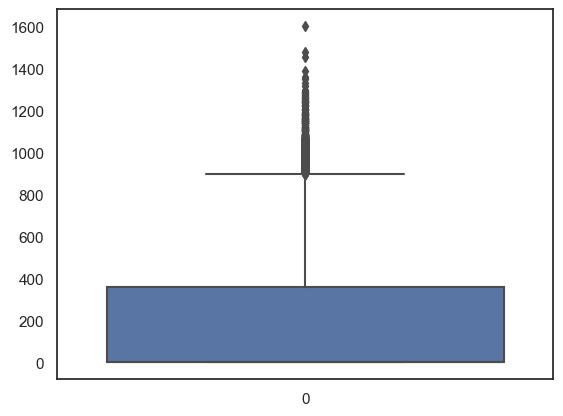

In [337]:
sns.boxplot(data_8['Radiation'])

In [341]:
#Calculamos rango intercuartil
Q1 = np.percentile (data_8['Radiation'], 25)
Q3 = np.percentile (data_8['Radiation'], 75)
IQR = Q3-Q1

minimo = (Q1 - 1.5*IQR)
maximo = (Q3 + 1.5*IQR)

#Eliminamos outliers
data_8 = data_8[(data_8['Radiation']>minimo) & (data_8['Radiation']<maximo)]

#formateamos horas a segundos
data_8['Time'] = data_8['Time'].apply(data_to_seconds)
data_8['TimeSunRise'] = data_8['TimeSunRise'].apply(data_to_seconds)
data_8['TimeSunSet'] = data_8['TimeSunSet'].apply(data_to_seconds)

#Data a formato fecha:
data_8['Data'] = pd.to_datetime(data_8['Data'])
data_8['Data'] = data_8['Data'].apply([lambda x: x.month])

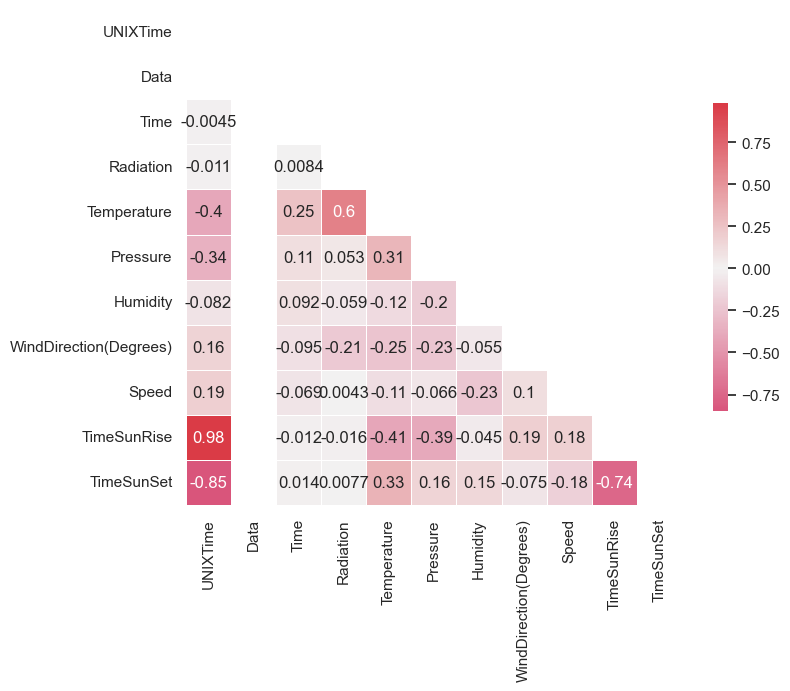

In [345]:
#Creamos otro heatmap (quitaremos Data y TimeSunRise)
plt.figure(figsize=(8, 8))

sns.set_theme(style='white')

mask=np.triu(np.ones_like(data_8.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(data_8.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [349]:
#segmentación
X = data_8.drop(columns = ['Data', 'TimeSunRise', 'Radiation'])
y = data_8['Radiation']

X_train, X_test, y_train, y_test = tts(X,y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#Normalización:
scaler = StandardScaler()  #inicializamos modelo
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_norm = scaler.transform(X)

In [350]:
#reinicializamos modelos
#regresiones lineales:
linreg = LinearRegression()
lass = Lasso()
rid = Ridge()    
elastic = ElasticNet()
#regresion de soporte vectorial
svr = SVR()
#RandomForest:
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()

#los entrenamos de nuevo:
#regresiones lineales:
linreg.fit(X_train, y_train)
lass.fit(X_train, y_train)
rid.fit(X_train, y_train) 
elastic .fit(X_train, y_train)
#regresion de soporte vectorial
svr.fit(X_train, y_train)
#RandomForest:
rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)

#calculamos predicciones:
#regresiones lineales:
y_pred_linreg = linreg.predict(X_test)
y_pred_lass = lass.predict(X_test)
y_pred_rid = rid.predict(X_test) 
y_pred_elastic = elastic .predict(X_test)
#regresion de soporte vectorial
y_pred_svr = svr.predict(X_test)
#RandomForest:
y_pred_rfr = rfr.predict(X_test)
y_pred_etr = etr.predict(X_test)

print('Evaluacion de modelos 8:')
print('Modelos de regresión lineal:')
print('LinearRegression:', mse(y_test, y_pred_linreg, squared=False))
print('Lasso:', mse(y_test, y_pred_lass, squared=False))
print('Ridge:', mse(y_test, y_pred_rid, squared=False))
print('ElasticNet:', mse(y_test, y_pred_elastic, squared=False))
print('Modelos de soporte vectorial:')
print('SVR:', mse(y_test, y_pred_svr, squared=False))
print('Modelos RandomForest:')
print('RandomForestRegressor:', mse(y_test, y_pred_rfr, squared=False))
print('ExtraTreeRegressor:', mse(y_test, y_pred_etr, squared=False))

Evaluacion de modelos 8:
Modelos de regresión lineal:
LinearRegression: 125.42617454546225
Lasso: 125.37221529067169
Ridge: 125.42577575513769
ElasticNet: 134.77986436621833
Modelos de soporte vectorial:
SVR: 134.46626213306075
Modelos RandomForest:
RandomForestRegressor: 45.96662905630554
ExtraTreeRegressor: 70.9523905778763


In [352]:
#ha salido mejor, pero esta vez no vamos a reentrenarlo con todo el dataset y pasamos al dataset final:

data_test=pd.read_csv('solar_test.csv')
data_test['Time'] = data_test['Time'].apply(data_to_seconds)
data_test['TimeSunSet'] = data_test['TimeSunSet'].apply(data_to_seconds)
data_test.drop(columns = ['Data', 'TimeSunRise', 'id'], inplace = True)
data_test = scaler.transform(data_test)
final_pred = rfr.predict(data_test)
submission['Radiation'] = final_pred
submission.to_csv('submission_iteration_9.csv', index=False)

**10a ITERACIÓN**

Ahora lo intentamos quitandolas columnas con una correlación casi 0 con la radiación, y una correlación de más de 80% entre sí. Unificamos otra vez las columnas Time, TimeSunSet y TimeSunRise

En total eliminamos: Data, UNIXTime, Speed, Time, TimeSunSet y TimeSunRise (estas tres las unificamos en un get_dummies)

In [369]:
data_10 = data.copy()

In [370]:
#formateo de fechas y horas
data_10['TimeSunRise'] = data_10['TimeSunRise'].apply(data_to_seconds)
data_10['TimeSunSet'] = data_10['TimeSunSet'].apply(data_to_seconds)
data_10['Time'] = data_10['Time'].apply(data_to_seconds)
data_10['Data'] = pd.to_datetime(data_10['Data'])

#unificamos las tres columnas de hora
data_10['Class_num'] = (data_10['TimeSunSet'] - data_10['TimeSunRise'])/5
data_10['DayTime'] = range(7, len(data_10)+7)
data_10.loc[data_10['Time'] < data_10['TimeSunRise'], 'DayTime'] = 'Noche'
data_10.loc[data_10['Time'] > data_10['TimeSunRise'], 'DayTime'] = 'Mañana'
data_10.loc[data_10['Time'] > (data_10['TimeSunRise'] + data_10['Class_num']), 'DayTime'] = 'Media-mañana'
data_10.loc[data_10['Time'] > (data_10['TimeSunRise'] + (2 * data_10['Class_num'])), 'DayTime'] = 'Mediodía'
data_10.loc[data_10['Time'] > (data_10['TimeSunRise'] + (3 * data_10['Class_num'])), 'DayTime'] = 'Media-tarde'
data_10.loc[data_10['Time'] > (data_10['TimeSunRise'] + (4 * data_10['Class_num'])), 'DayTime'] = 'Tarde'
data_10.loc[data_10['Time'] > data_10['TimeSunSet'], 'DayTime'] = 'Noche'
data_10.drop(columns = 'Class_num', inplace = True)

In [371]:
data_10.drop(columns = ['Time', 'TimeSunRise', 'TimeSunSet'], inplace = True)

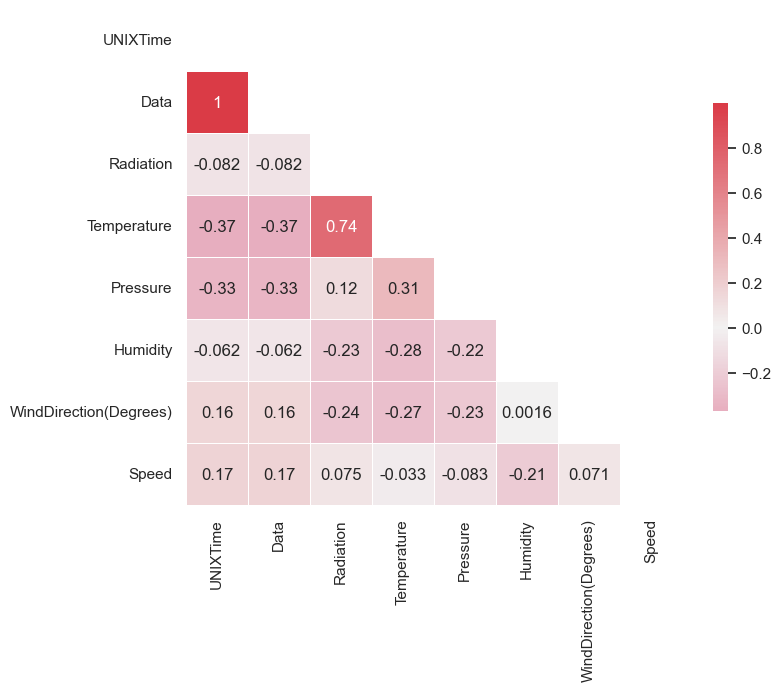

In [372]:
#Creamos otro heatmap (quitaremos Data y UNIXTime -porque son iguales y tienen poca correlacion con Radiation - y Speed -poca correlacion con Radiation-)
plt.figure(figsize=(8, 8))

sns.set_theme(style='white')

mask=np.triu(np.ones_like(data_10.drop(columns = ['DayTime']).corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(data_10.drop(columns = ['DayTime']).corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [374]:
X = data_10.drop(columns = ['Data', 'UNIXTime','Speed', 'Radiation'])
X = pd.get_dummies(X, drop_first = True, dtype = int)
y = data_10['Radiation']

X_train, X_test, y_train, y_test = tts(X,y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

scaler = StandardScaler()  #inicializamos modelo
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_norm = scaler.transform(X)

In [375]:
#reinicializamos modelos
#regresiones lineales:
linreg = LinearRegression()
lass = Lasso()
rid = Ridge()    
elastic = ElasticNet()
#regresion de soporte vectorial
svr = SVR()
#RandomForest:
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()

#los entrenamos de nuevo:
#regresiones lineales:
linreg.fit(X_train, y_train)
lass.fit(X_train, y_train)
rid.fit(X_train, y_train) 
elastic .fit(X_train, y_train)
#regresion de soporte vectorial
svr.fit(X_train, y_train)
#RandomForest:
rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)

#calculamos predicciones:
#regresiones lineales:
y_pred_linreg = linreg.predict(X_test)
y_pred_lass = lass.predict(X_test)
y_pred_rid = rid.predict(X_test) 
y_pred_elastic = elastic .predict(X_test)
#regresion de soporte vectorial
y_pred_svr = svr.predict(X_test)
#RandomForest:
y_pred_rfr = rfr.predict(X_test)
y_pred_etr = etr.predict(X_test)

print('Evaluacion de modelos 10:')
print('Modelos de regresión lineal:')
print('LinearRegression:', mse(y_test, y_pred_linreg, squared=False))
print('Lasso:', mse(y_test, y_pred_lass, squared=False))
print('Ridge:', mse(y_test, y_pred_rid, squared=False))
print('ElasticNet:', mse(y_test, y_pred_elastic, squared=False))
print('Modelos de soporte vectorial:')
print('SVR:', mse(y_test, y_pred_svr, squared=False))
print('Modelos RandomForest:')
print('RandomForestRegressor:', mse(y_test, y_pred_rfr, squared=False))
print('ExtraTreeRegressor:', mse(y_test, y_pred_etr, squared=False))


Evaluacion de modelos 10:
Modelos de regresión lineal:
LinearRegression: 146.9151752141557
Lasso: 146.8987362101853
Ridge: 146.9149009761447
ElasticNet: 158.25478148140843
Modelos de soporte vectorial:
SVR: 148.69079204567845
Modelos RandomForest:
RandomForestRegressor: 107.45700037251514
ExtraTreeRegressor: 137.04362043984818


In [ ]:
#Más alto que el resto, no lo retesteamos

**11a ITERACIÓN**

Eliminamos todas las columnas de tiempo menos UNIXTime y Time (en segundos), y eliminamos Speed por la poca correlación que habíamos visto ya antes

In [388]:
data_11 = data.copy()
data_11.drop(columns =['Data', 'TimeSunRise', 'TimeSunSet', 'Speed'], inplace = True)
data_11['Time'] = data_11['Time'].apply(data_to_seconds)

In [389]:
X = data_11.drop(columns = ['Radiation'])
y = data_11['Radiation']

X_train, X_test, y_train, y_test = tts(X,y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

scaler = StandardScaler()  #inicializamos modelo
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_norm = scaler.transform(X)

In [390]:
#reinicializamos modelos
#regresiones lineales:
linreg = LinearRegression()
lass = Lasso()
rid = Ridge()    
elastic = ElasticNet()
#regresion de soporte vectorial
svr = SVR()
#RandomForest:
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()

#los entrenamos de nuevo:
#regresiones lineales:
linreg.fit(X_train, y_train)
lass.fit(X_train, y_train)
rid.fit(X_train, y_train) 
elastic .fit(X_train, y_train)
#regresion de soporte vectorial
svr.fit(X_train, y_train)
#RandomForest:
rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)

#calculamos predicciones:
#regresiones lineales:
y_pred_linreg = linreg.predict(X_test)
y_pred_lass = lass.predict(X_test)
y_pred_rid = rid.predict(X_test) 
y_pred_elastic = elastic .predict(X_test)
#regresion de soporte vectorial
y_pred_svr = svr.predict(X_test)
#RandomForest:
y_pred_rfr = rfr.predict(X_test)
y_pred_etr = etr.predict(X_test)

print('Evaluacion de modelos 11:')
print('Modelos de regresión lineal:')
print('LinearRegression:', mse(y_test, y_pred_linreg, squared=False))
print('Lasso:', mse(y_test, y_pred_lass, squared=False))
print('Ridge:', mse(y_test, y_pred_rid, squared=False))
print('ElasticNet:', mse(y_test, y_pred_elastic, squared=False))
print('Modelos de soporte vectorial:')
print('SVR:', mse(y_test, y_pred_svr, squared=False))
print('Modelos RandomForest:')
print('RandomForestRegressor:', mse(y_test, y_pred_rfr, squared=False))
print('ExtraTreeRegressor:', mse(y_test, y_pred_etr, squared=False))


Evaluacion de modelos 11:
Modelos de regresión lineal:
LinearRegression: 192.85096676531842
Lasso: 192.8604489036422
Ridge: 192.85052462877903
ElasticNet: 215.81737395689584
Modelos de soporte vectorial:
SVR: 186.8827240153304
Modelos RandomForest:
RandomForestRegressor: 82.87540432967529
ExtraTreeRegressor: 114.46083902043044


**12 ITERACIÓN**

Mismo que la 11, quitando algunos outliers (menos que en la iteración 9 - hasta 1200)

RMSE: 81.63354

In [392]:
data_11.head(2)

,UNIXTime,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees)
0,1475175023,31823,634.99,61,30.46,41,14.96
1,1481799902,3902,1.27,37,30.26,70,207.43


In [393]:
#Calculamos rango intercuartil
Q1 = np.percentile (data_11['Radiation'], 25)
Q3 = np.percentile (data_11['Radiation'], 75)
IQR = Q3-Q1

minimo = (Q1 - 2*IQR)
maximo = (Q3 + 2*IQR)

#Eliminamos outliers
data_11 = data_11[(data_11['Radiation']>minimo) & (data_11['Radiation']<maximo)]

In [394]:
data_11.describe().T

,count,mean,std,min,25%,50%,75%,max
UNIXTime,24405.0,1.478060e+09,3.005912e+06,1.472724e+09,1.475548e+09,1.478067e+09,1.480595e+09,1.483265e+09
Time,24405.0,4.313271e+04,2.497432e+04,1.000000e+00,2.132300e+04,4.321900e+04,6.481900e+04,8.618500e+04
Radiation,24405.0,2.037271e+02,3.100358e+02,1.130000e+00,1.230000e+00,2.650000e+00,3.535300e+02,1.077090e+03
Temperature,24405.0,5.106650e+01,6.196170e+00,3.400000e+01,4.600000e+01,5.000000e+01,5.500000e+01,7.100000e+01
Pressure,24405.0,3.042263e+01,5.478997e-02,3.019000e+01,3.040000e+01,3.043000e+01,3.046000e+01,3.056000e+01
Humidity,24405.0,7.497910e+01,2.602616e+01,1.100000e+01,5.500000e+01,8.500000e+01,9.700000e+01,1.030000e+02
WindDirection(Degrees),24405.0,1.432896e+02,8.270561e+01,9.000000e-02,8.263000e+01,1.477500e+02,1.792400e+02,3.599500e+02


In [395]:
X = data_11.drop(columns = ['Radiation'])
y = data_11['Radiation']

X_train, X_test, y_train, y_test = tts(X,y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

scaler = StandardScaler()  #inicializamos modelo
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_norm = scaler.transform(X)

In [396]:
#reinicializamos modelos
#regresiones lineales:
linreg = LinearRegression()
lass = Lasso()
rid = Ridge()    
elastic = ElasticNet()
#regresion de soporte vectorial
svr = SVR()
#RandomForest:
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()

#los entrenamos de nuevo:
#regresiones lineales:
linreg.fit(X_train, y_train)
lass.fit(X_train, y_train)
rid.fit(X_train, y_train) 
elastic .fit(X_train, y_train)
#regresion de soporte vectorial
svr.fit(X_train, y_train)
#RandomForest:
rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)

#calculamos predicciones:
#regresiones lineales:
y_pred_linreg = linreg.predict(X_test)
y_pred_lass = lass.predict(X_test)
y_pred_rid = rid.predict(X_test) 
y_pred_elastic = elastic .predict(X_test)
#regresion de soporte vectorial
y_pred_svr = svr.predict(X_test)
#RandomForest:
y_pred_rfr = rfr.predict(X_test)
y_pred_etr = etr.predict(X_test)

print('Evaluacion de modelos 12:')
print('Modelos de regresión lineal:')
print('LinearRegression:', mse(y_test, y_pred_linreg, squared=False))
print('Lasso:', mse(y_test, y_pred_lass, squared=False))
print('Ridge:', mse(y_test, y_pred_rid, squared=False))
print('ElasticNet:', mse(y_test, y_pred_elastic, squared=False))
print('Modelos de soporte vectorial:')
print('SVR:', mse(y_test, y_pred_svr, squared=False))
print('Modelos RandomForest:')
print('RandomForestRegressor:', mse(y_test, y_pred_rfr, squared=False))
print('ExtraTreeRegressor:', mse(y_test, y_pred_etr, squared=False))


Evaluacion de modelos 12:
Modelos de regresión lineal:
LinearRegression: 185.01112907537023
Lasso: 184.9529908728046
Ridge: 185.0104481130055
ElasticNet: 207.71318010781337
Modelos de soporte vectorial:
SVR: 179.00970151984532
Modelos RandomForest:
RandomForestRegressor: 71.22778422101973
ExtraTreeRegressor: 120.76318601275867


In [397]:
#ha salido mejor, pero esta vez no vamos a reentrenarlo con todo el dataset y pasamos al dataset final:

data_test=pd.read_csv('solar_test.csv')

#transformaciones de esta iteración
data_test.drop(columns =['Data', 'TimeSunRise', 'TimeSunSet', 'Speed', 'id'], inplace = True)
data_test['Time'] = data_test['Time'].apply(data_to_seconds)

#normalización, perdicción y resultados
data_test = scaler.transform(data_test)
final_pred = rfr.predict(data_test)
submission['Radiation'] = final_pred
submission.to_csv('submission_iteration_12.csv', index=False)

**13 ITERATION**

Nos quedamos con UNIXTime (eliminamos Data), unificamos franjas horarias con get_dummies, quitamos speed y dirección del viento y algunos outliers (IQR * 2)

In [444]:
data_13 = data.copy()

In [445]:
data_13['TimeSunRise'] = data_13['TimeSunRise'].apply(data_to_seconds)
data_13['TimeSunSet'] = data_13['TimeSunSet'].apply(data_to_seconds)
data_13['Time'] = data_13['Time'].apply(data_to_seconds)


data_13['Class_num'] = (data_13['TimeSunSet'] - data_13['TimeSunRise'])/5
data_13['DayTime'] = range(7, len(data_13)+7)
data_13.loc[data_13['Time'] < data_13['TimeSunRise'], 'DayTime'] = 'Noche'
data_13.loc[data_13['Time'] > data_13['TimeSunRise'], 'DayTime'] = 'Mañana'
data_13.loc[data_13['Time'] > (data_13['TimeSunRise'] + data_13['Class_num']), 'DayTime'] = 'Media-mañana'
data_13.loc[data_13['Time'] > (data_13['TimeSunRise'] + (2 * data_13['Class_num'])), 'DayTime'] = 'Mediodía'
data_13.loc[data_13['Time'] > (data_13['TimeSunRise'] + (3 * data_13['Class_num'])), 'DayTime'] = 'Media-tarde'
data_13.loc[data_13['Time'] > (data_13['TimeSunRise'] + (4 * data_13['Class_num'])), 'DayTime'] = 'Tarde'
data_13.loc[data_13['Time'] > data_13['TimeSunSet'], 'DayTime'] = 'Noche'
data_13.drop(columns = ['Class_num', 'TimeSunSet', 'TimeSunRise', 'Time', 'Data', 'Speed', 'WindDirection(Degrees)'], inplace = True)

data_13.head(1)

,UNIXTime,Radiation,Temperature,Pressure,Humidity,DayTime
0,1475175023,634.99,61,30.46,41,Media-mañana


In [446]:
#Quitamos algunos outliers:

Q1 = np.percentile (data_13['Radiation'], 25)
Q3 = np.percentile (data_13['Radiation'], 75)
IQR = Q3-Q1

minimo = (Q1 - 2*IQR)
maximo = (Q3 + 2*IQR)

#Eliminamos outliers
data_13 = data_13[(data_13['Radiation']>minimo) & (data_13['Radiation']<maximo)]

In [447]:
X = data_13.drop(columns = ['Radiation'])
X = pd.get_dummies(X, drop_first = True, dtype = int)
y = data_13['Radiation']

X_train, X_test, y_train, y_test = tts(X,y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

scaler = StandardScaler()  #inicializamos modelo
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_norm = scaler.transform(X)

In [448]:
#reinicializamos modelos
#regresiones lineales:
linreg = LinearRegression()
lass = Lasso()
rid = Ridge()    
elastic = ElasticNet()
#regresion de soporte vectorial
svr = SVR()
#RandomForest:
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()

#los entrenamos de nuevo:
#regresiones lineales:
linreg.fit(X_train, y_train)
lass.fit(X_train, y_train)
rid.fit(X_train, y_train) 
elastic .fit(X_train, y_train)
#regresion de soporte vectorial
svr.fit(X_train, y_train)
#RandomForest:
rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)

#calculamos predicciones:
#regresiones lineales:
y_pred_linreg = linreg.predict(X_test)
y_pred_lass = lass.predict(X_test)
y_pred_rid = rid.predict(X_test) 
y_pred_elastic = elastic .predict(X_test)
#regresion de soporte vectorial
y_pred_svr = svr.predict(X_test)
#RandomForest:
y_pred_rfr = rfr.predict(X_test)
y_pred_etr = etr.predict(X_test)

print('Evaluacion de modelos 13:')
print('Modelos de regresión lineal:')
print('LinearRegression:', mse(y_test, y_pred_linreg, squared=False))
print('Lasso:', mse(y_test, y_pred_lass, squared=False))
print('Ridge:', mse(y_test, y_pred_rid, squared=False))
print('ElasticNet:', mse(y_test, y_pred_elastic, squared=False))
print('Modelos de soporte vectorial:')
print('SVR:', mse(y_test, y_pred_svr, squared=False))
print('Modelos RandomForest:')
print('RandomForestRegressor:', mse(y_test, y_pred_rfr, squared=False))
print('ExtraTreeRegressor:', mse(y_test, y_pred_etr, squared=False))

Evaluacion de modelos 13:
Modelos de regresión lineal:
LinearRegression: 140.4602898972875
Lasso: 140.53321985083068
Ridge: 140.4606362966035
ElasticNet: 155.26603110641514
Modelos de soporte vectorial:
SVR: 138.54589766777266
Modelos RandomForest:
RandomForestRegressor: 75.44495190566863
ExtraTreeRegressor: 106.99715622888536


In [452]:
#ha salido mejor, pero esta vez no vamos a reentrenarlo con todo el dataset y pasamos al dataset final:

data_test=pd.read_csv('solar_test.csv')

#transformaciones de esta iteración
data_test['TimeSunRise'] = data_test['TimeSunRise'].apply(data_to_seconds)
data_test['TimeSunSet'] = data_test['TimeSunSet'].apply(data_to_seconds)
data_test['Time'] = data_test['Time'].apply(data_to_seconds)


data_test['Class_num'] = (data_test['TimeSunSet'] - data_test['TimeSunRise'])/5
data_test['DayTime'] = range(7, len(data_test)+7)
data_test.loc[data_test['Time'] < data_test['TimeSunRise'], 'DayTime'] = 'Noche'
data_test.loc[data_test['Time'] > data_test['TimeSunRise'], 'DayTime'] = 'Mañana'
data_test.loc[data_test['Time'] > (data_test['TimeSunRise'] + data_test['Class_num']), 'DayTime'] = 'Media-mañana'
data_test.loc[data_test['Time'] > (data_test['TimeSunRise'] + (2 * data_test['Class_num'])), 'DayTime'] = 'Mediodía'
data_test.loc[data_test['Time'] > (data_test['TimeSunRise'] + (3 * data_test['Class_num'])), 'DayTime'] = 'Media-tarde'
data_test.loc[data_test['Time'] > (data_test['TimeSunRise'] + (4 * data_test['Class_num'])), 'DayTime'] = 'Tarde'
data_test.loc[data_test['Time'] > data_test['TimeSunSet'], 'DayTime'] = 'Noche'
data_test.drop(columns = ['Class_num', 'TimeSunSet', 'TimeSunRise', 'Time', 'Data', 'Speed', 'WindDirection(Degrees)', 'id'], inplace = True)

data_test = pd.get_dummies(data_test, drop_first = True, dtype = int)

#normalización, perdicción y resultados
data_test = scaler.transform(data_test)
final_pred = rfr.predict(data_test)
submission['Radiation'] = final_pred
submission.to_csv('submission_iteration_13.csv', index=False)

**14 ITERACIÓN**

En lugar de franjas horarias, vamos a utilizar los datos de las columnas TimeSunRise y TimeSunSet para calcular el tiempo de luz en el día (en segundos)

In [471]:
data_14 = data.copy()

In [472]:
data_14['TimeSunSet'] = data_14['TimeSunSet'].apply(data_to_seconds)
data_14['TimeSunRise'] = data_14['TimeSunRise'].apply(data_to_seconds)
data_14['Time'] = data_14['Time'].apply(data_to_seconds)
data_14['DayDuration'] = data_14['TimeSunSet'] - data_14['TimeSunRise']
data_14.drop(columns =['TimeSunSet', 'TimeSunRise', 'Data'], inplace = True)

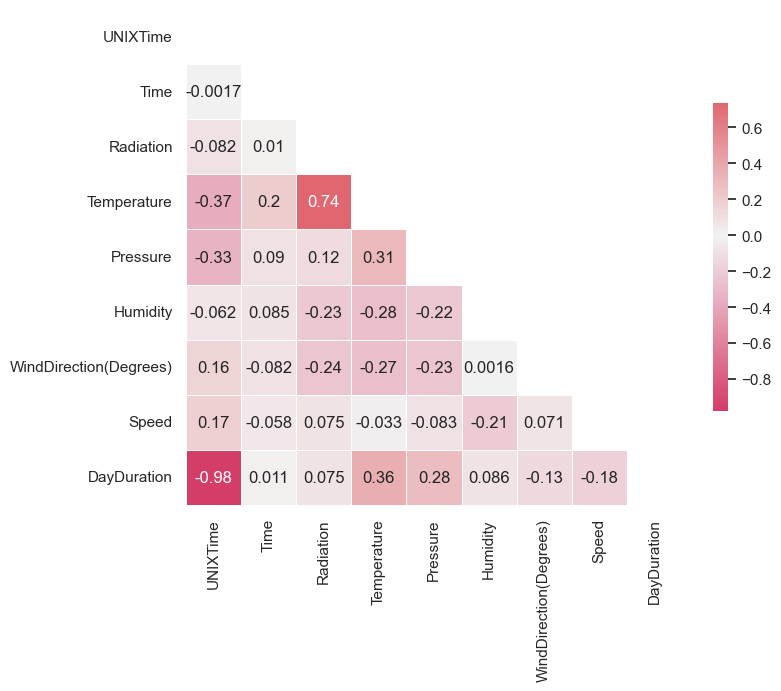

In [467]:
plt.figure(figsize=(8, 8))

sns.set_theme(style='white')

mask=np.triu(np.ones_like(data_14.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(data_14.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [474]:
X = data_14.drop(columns = ['Radiation'])
y = data_14['Radiation']

In [475]:
X_train, X_test, y_train, y_test = tts(X,y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

scaler = StandardScaler()  #inicializamos modelo
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_norm = scaler.transform(X)

In [476]:
#reinicializamos modelos
#regresiones lineales:
linreg = LinearRegression()
lass = Lasso()
rid = Ridge()    
elastic = ElasticNet()
#regresion de soporte vectorial
svr = SVR()
#RandomForest:
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()

#los entrenamos de nuevo:
#regresiones lineales:
linreg.fit(X_train, y_train)
lass.fit(X_train, y_train)
rid.fit(X_train, y_train) 
elastic .fit(X_train, y_train)
#regresion de soporte vectorial
svr.fit(X_train, y_train)
#RandomForest:
rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)

#calculamos predicciones:
#regresiones lineales:
y_pred_linreg = linreg.predict(X_test)
y_pred_lass = lass.predict(X_test)
y_pred_rid = rid.predict(X_test) 
y_pred_elastic = elastic .predict(X_test)
#regresion de soporte vectorial
y_pred_svr = svr.predict(X_test)
#RandomForest:
y_pred_rfr = rfr.predict(X_test)
y_pred_etr = etr.predict(X_test)

print('Evaluacion de modelos test 14:')
print('Modelos de regresión lineal:')
print('LinearRegression:', mse(y_test, y_pred_linreg, squared=False))
print('Lasso:', mse(y_test, y_pred_lass, squared=False))
print('Ridge:', mse(y_test, y_pred_rid, squared=False))
print('ElasticNet:', mse(y_test, y_pred_elastic, squared=False))
print('Modelos de soporte vectorial:')
print('SVR:', mse(y_test, y_pred_svr, squared=False))
print('Modelos RandomForest:')
print('RandomForestRegressor:', mse(y_test, y_pred_rfr, squared=False))
print('ExtraTreeRegressor:', mse(y_test, y_pred_etr, squared=False))

Evaluacion de modelos test 14:
Modelos de regresión lineal:
LinearRegression: 192.6927140468161
Lasso: 192.7425969406505
Ridge: 192.6932305256099
ElasticNet: 218.77535011917058
Modelos de soporte vectorial:
SVR: 206.4537948524641
Modelos RandomForest:
RandomForestRegressor: 82.07976924909498
ExtraTreeRegressor: 131.02023783417707


15

Partimos de los datos del test 7 pero haciendo una selección proporcional de horas del día

RMSE: 83.9213

In [502]:
X = data_5.drop(columns = ['TimeSunRise', 'Data', 'TimeSunSet', 'Radiation'])
replacements = {'Noche':0, 'Mañana':1, 'Media-mañana':2, 'Mediodía':3, 'Media-tarde':4, 'Tarde':5}
X['DayTime'].replace(replacements, inplace=True)
y = data_5['Radiation']

In [503]:
X_train, X_test, y_train, y_test = tts(X,y, stratify = X['DayTime'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

scaler = StandardScaler()  #inicializamos modelo
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_norm = scaler.transform(X)

In [515]:
#reinicializamos modelos
rfr = RandomForestRegressor(n_estimators=100, max_depth = None)

#los entrenamos de nuevo:
rfr.fit(X_train, y_train)

#calculamos predicciones:
y_pred_rfr = rfr.predict(X_test)

print('Evaluacion de modelos test 15:')
print('RandomForestRegressor:', mse(y_test, y_pred_rfr, squared=False))

Evaluacion de modelos test 15:
RandomForestRegressor: 79.45020670746841


In [507]:
#Lo aplicamos al dataset de prueba:
data_test=pd.read_csv('solar_test.csv')
data_test['Time'] = data_test['Time'].apply(data_to_seconds)
data_test['TimeSunRise'] = data_test['TimeSunRise'].apply(data_to_seconds)
data_test['TimeSunSet'] = data_test['TimeSunSet'].apply(data_to_seconds)
data_test['Class_num'] = (data_test['TimeSunSet'] - data_test['TimeSunRise'])/5
data_test['DayTime'] = range(7, len(data_test)+7)
data_test.loc[data_test['Time'] < data_test['TimeSunRise'], 'DayTime'] = 'Noche'
data_test.loc[data_test['Time'] > data_test['TimeSunRise'], 'DayTime'] = 'Mañana'
data_test.loc[data_test['Time'] > (data_test['TimeSunRise'] + data_test['Class_num']), 'DayTime'] = 'Media-mañana'
data_test.loc[data_test['Time'] > (data_test['TimeSunRise'] + (2 * data_test['Class_num'])), 'DayTime'] = 'Mediodía'
data_test.loc[data_test['Time'] > (data_test['TimeSunRise'] + (3 * data_test['Class_num'])), 'DayTime'] = 'Media-tarde'
data_test.loc[data_test['Time'] > (data_test['TimeSunRise'] + (4 * data_test['Class_num'])), 'DayTime'] = 'Tarde'
data_test.loc[data_test['Time'] > data_test['TimeSunSet'], 'DayTime'] = 'Noche'
data_test.drop(columns = ['Class_num', 'TimeSunSet', 'TimeSunRise'], inplace = True)

In [511]:
data_test['DayTime'].replace(replacements, inplace=True)
data_test.drop(columns = 'Data', inplace = True)

In [513]:
data_test.drop(columns = 'id', inplace = True)

In [514]:
#normalización, perdicción y resultados
data_test = scaler.transform(data_test)
final_pred = rfr.predict(data_test)
submission['Radiation'] = final_pred
submission.to_csv('submission_iteration_15.csv', index=False)

**16 ITERACIÓN**

Cambiamos las unidades de temperatura a celsius (la máquina lo entenderá mejor) y usaremos una clasificación por momentos del día pero reduciendo el número de mediciones nocturnas para igualarlas con la noche

Sólo utilizamos el modelo RandomForest.

In [522]:
data_16 = data.copy()

In [523]:
data_16['TimeSunRise'] = data_16['TimeSunRise'].apply(data_to_seconds)
data_16['TimeSunSet'] = data_16['TimeSunSet'].apply(data_to_seconds)
data_16['Time'] = data_16['Time'].apply(data_to_seconds)
data_16['TempCelsius'] = (data_16['Temperature'] - 32)*5/9
data_16['Data'] = pd.to_datetime(data_16['Data'])
data_16['Month'] = data_16['Data'].apply([lambda x: x.month])
data_16.drop(columns =['Temperature', 'Data'], inplace = True)

In [529]:
#calculamos si es día o noche:
data_16['DayTime'] = range(len(data_16))
data_16.loc[data_16['Time'] < data_16['TimeSunRise'], 'DayTime'] = 0
data_16.loc[data_16['Time'] > data_16['TimeSunRise'], 'DayTime'] = 1
data_16.loc[data_16['Time'] > data_16['TimeSunSet'], 'DayTime'] = 0

In [532]:
data_16['HoursSun'] = data_16['TimeSunSet'] - data_16['TimeSunRise']
data_16.drop(columns = ['TimeSunRise', 'TimeSunSet'], inplace = True)

In [535]:
night = (data_16[data_16['DayTime'] == 0]).sample(n=len(data_16[data_16['DayTime'] == 1]))
day = data_16[data_16['DayTime'] == 1]

In [536]:
data_16 = pd.merge(night, day, how = 'outer')

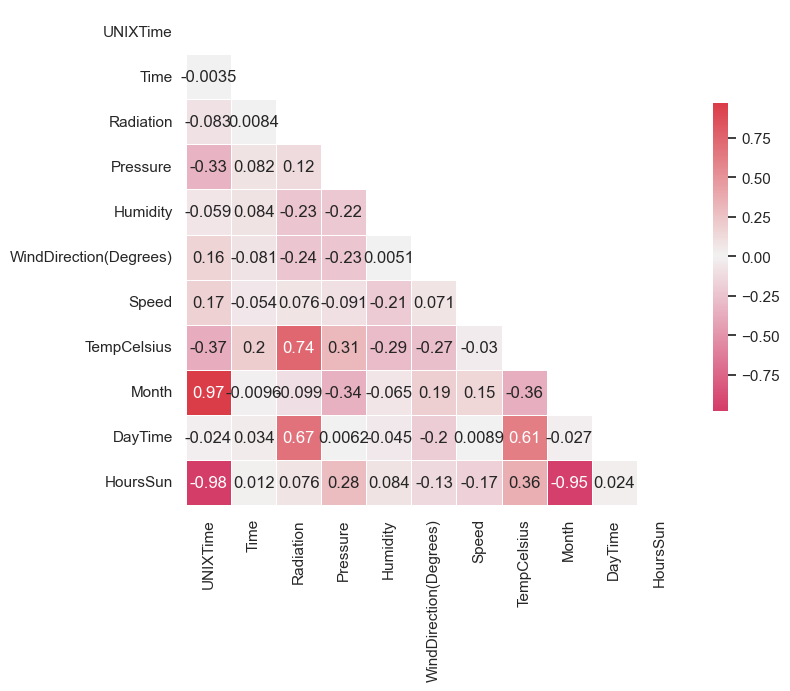

In [541]:
plt.figure(figsize=(8, 8))

sns.set_theme(style='white')

mask=np.triu(np.ones_like(data_16.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(data_16.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [542]:
X = data_16.drop(columns = ['Radiation', 'HoursSun', 'Month'])
y = data_16['Radiation']

In [543]:
X_train, X_test, y_train, y_test = tts(X,y, stratify = X['DayTime'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

scaler = StandardScaler()  #inicializamos modelo
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_norm = scaler.transform(X)

In [544]:
#reinicializamos modelos
rfr = RandomForestRegressor(n_estimators=100, max_depth = None)

#los entrenamos de nuevo:
rfr.fit(X_train, y_train)

#calculamos predicciones:
y_pred_rfr = rfr.predict(X_test)

print('Evaluacion de modelos test 15:')
print('RandomForestRegressor:', mse(y_test, y_pred_rfr, squared=False))

Evaluacion de modelos test 15:
RandomForestRegressor: 81.48676357492783
